In [1]:
def processText(text, tokenizer, stemmer, stopwords):
    """
    Perform tokenisation, normalisation (lower case and stemming) and stopword and twitter keyword removal.

    @param text: reddit submission or comment text
    @param tokenizer: tokeniser used.
    @param stemmer: stemmer used.
    @param stopwords: list of stopwords used

    @returns: a list of processed tokens
    """

    # covert all to lower case
    text = text.lower()
    # tokenise
    lTokens = tokenizer.tokenize(text)
    # strip whitespaces before and after
    lTokens = [token.strip() for token in lTokens]
    # stem (we use set to remove duplicates)
    lStemmedTokens = set([stemmer.stem(tok) for tok in lTokens])


    # remove stopwords, digits
    return [tok for tok in lStemmedTokens if tok not in stopwords and not tok.isdigit()]

In [2]:
import pandas as pd
import string
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
import numpy as np
import math
from collections import Counter

import pyLDAvis
import pyLDAvis.lda_model
from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rayhi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# load csv file
fCsvName = 'dataFromReddit_programming.csv'

# tweet to use
postTokeniser = nltk.tokenize.TweetTokenizer()
# use the punctuation symbols defined in string.punctuation
lPunct = list(string.punctuation)
# use stopwords from nltk and a few other twitter specific terms like 'rt' (retweet)
lStopwords = nltk.corpus.stopwords.words('english') + lPunct + ['via']
# we use the popular Porter stemmer
postStemmer = nltk.stem.PorterStemmer()

# our term frequency counter
termFreqCounter = Counter()

In [4]:
# read csv data
csvPD=pd.read_csv(fCsvName)

# this will store the list of posts we read from subreddit
lPosts = []


data_list = csvPD['Title'].tolist()+csvPD['Body'].tolist()+csvPD['TopComment'].tolist()
data_list = [x for x in data_list if not (isinstance(x, (float, np.float64)) and np.isnan(x))]

# print out the hot submisisons
for submission in data_list:
    # tokenise, filter stopwords and get convert to lower case
    lTokens = processText(text=submission, tokenizer=postTokeniser, stemmer=postStemmer, stopwords=lStopwords)
    lPosts.append(' '.join(lTokens))


In [5]:
# remove words
remove_list = ['ha','whi','thi','tri','wa']

In [6]:
lPosts = [' '.join([word for word in sentence.split() if word not in remove_list]) for sentence in lPosts]

In [7]:
# LDA
# number of topics to discover (default = 10)
topicNum = 8
# maximum number of words to display per topic (default = 10)
wordNumToDisplay = 15
# this is the number of features/words to used to describe our documents
# please feel free to change to see effect
featureNum = 1500

In [8]:
for topic_num in range(1,10):
    tfVectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=featureNum, stop_words='english')
    tf = tfVectorizer.fit_transform(lPosts)
    # extract the names of the features (in our case, the words)
    tfFeatureNames = tfVectorizer.get_feature_names_out()


    #
    # LDA MODEL
    #

    # Run LDA (see documentation about what the arguments means)
    ldaModel = LatentDirichletAllocation(n_components =topic_num, max_iter=10, learning_method='online').fit(tf)
    print('topic num: ',topic_num, '\nperplexity: ', ldaModel.perplexity(tf), '\nscore: ', ldaModel.score(tf))

topic num:  1 
perplexity:  1054.30675311154 
score:  -119702.1041343227
topic num:  2 
perplexity:  1150.4996599330475 
score:  -121203.62390412648
topic num:  3 
perplexity:  1220.9207770671392 
score:  -122225.28003800582
topic num:  4 
perplexity:  1278.4401088494826 
score:  -123016.95013110651
topic num:  5 
perplexity:  1359.8863991746487 
score:  -124079.04538849359
topic num:  6 
perplexity:  1404.7786993820598 
score:  -124637.5801272557
topic num:  7 
perplexity:  1436.4461127645786 
score:  -125020.94089327977
topic num:  8 
perplexity:  1484.7212494201497 
score:  -125589.38700499789
topic num:  9 
perplexity:  1480.9654652350127 
score:  -125545.82997327125


In [9]:
topicNum = 6

In [10]:
#
# Count Vectorizer
#

tfVectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=featureNum, stop_words='english')
tf = tfVectorizer.fit_transform(lPosts)
# extract the names of the features (in our case, the words)
tfFeatureNames = tfVectorizer.get_feature_names_out()


#
# LDA MODEL
#

# Run LDA (see documentation about what the arguments means)
ldaModel = LatentDirichletAllocation(n_components =topicNum, max_iter=10, learning_method='online').fit(tf)

In [11]:
# import torchvision.models as models

In [12]:
# import gensim

In [13]:
# build a dictionary which for each tweet, each word has its own id.
# tweets_dictionary = gensim.corpora.Dictionary(csvPD['Title'])  

# # build the corpus, i.e. vectors with the number of occurence of each word per tweet
# bow_corpus = [tweets_dictionary.doc2bow(doc) for doc in csvPD['Title']]

# tweets_coherence = []
# for n in range(5, 15):   
#     # Multi-core implementation:
#     lda = LatentDirichletAllocation(n_components =topicNum, max_iter=10, learning_method='online').fit(tf)
    
#     # ompute coherence for each lda model with different number of topics
#     cohm = CoherenceModel(model = lda, corpus = bow_corpus, dictionary = tweets_dictionary, coherence = 'u_mass')
#     coh = cohm.get_coherence()
#     tweets_coherence.append(coh)

In [14]:
def display_topics(model, featureNames, numTopWords):
    """
    Prints out the most associated words for each feature.

    @param model: lda model.
    @param featureNames: list of strings, representing the list of features/words.
    @param numTopWords: number of words to print per topic.
    """

    # print out the topic distributions
    for topicId, lTopicDist in enumerate(model.components_):
        print("Topic %d:" % (topicId))
        print(" ".join([featureNames[i] for i in lTopicDist.argsort()[:-numTopWords - 1:-1]]))

In [15]:
display_topics(ldaModel, tfFeatureNames, wordNumToDisplay)

Topic 0:
year run chang code develop use app comput old ago game version file 000 user
Topic 1:
like work time thing peopl use make becaus realli problem think need onli way code
Topic 2:
use googl cours reddit hi gener free becom code access program api softwar blog list
Topic 3:
work great program languag featur best visual post code anyon note sort secur compil vulner
Topic 4:
sourc open github code window microsoft linux hack releas public comment web use appl app
Topic 5:
https com http www read org good edit algorithm link check en number memori comput


In [16]:
panel = pyLDAvis.lda_model.prepare(ldaModel, tf, tfVectorizer, mds='tsne')
pyLDAvis.display(panel)

In [17]:
def displayWordcloud(model, featureNames):
    """
    Displays the word cloud of the topic distributions, stored in model.

    @param model: lda model.
    @param featureNames: list of strings, representing the list of features/words.
    """

    # this normalises each row/topic to sum to one
    # use this normalisedComponents to display your wordclouds
    normalisedComponents = model.components_ / model.components_.sum(axis=1)[:, np.newaxis]
    
    topicNum = len(model.components_)
    # number of wordclouds for each row
    plotColNum = 1
    # number of wordclouds for each column
    plotRowNum = int(math.ceil(topicNum / plotColNum))

    for topicId, lTopicDist in enumerate(normalisedComponents):
        lWordProb = {featureNames[i] : wordProb for i,wordProb in enumerate(lTopicDist)}
        wordcloud = WordCloud(background_color='black',scale=25)
        wordcloud.fit_words(frequencies=lWordProb)
        plt.subplot(plotRowNum, plotColNum, topicId+1)
        plt.title('Topic %d:' % (topicId+1))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
    plt.rcParams['figure.figsize']=(10.0,18.0)
    plt.show(block=True)
    print()

E:\ProgrammingEnvironment\Anaconda\envs\DataScience\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
E:\ProgrammingEnvironment\Anaconda\envs\DataScience\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
E:\ProgrammingEnvironment\Anaconda\envs\DataScience\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.co

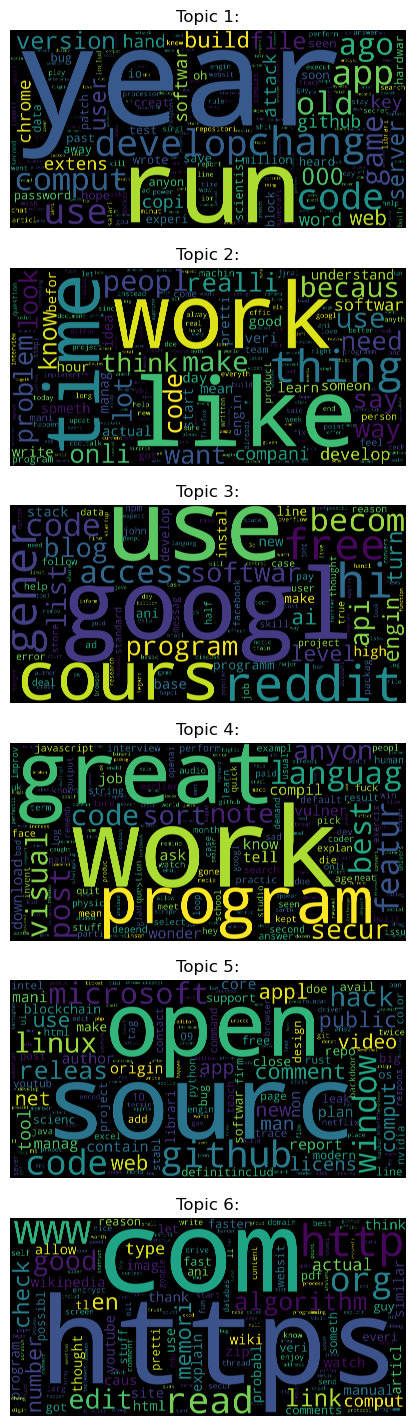

In [19]:
# display wordcloud
displayWordcloud(ldaModel, tfFeatureNames)